**# Ablation cases: 4**

In [ ]:
!pip install -U tensorboard_plugin_profile
%load_ext tensorboard
from datetime import datetime
from packaging import version
import tensorflow as tf
import tensorflow_datasets as tfds
import os,time
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard

tfds.disable_progress_bar()

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(ds_test)
print(ds_train)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label


def process_images(image, label):
    
    image = tf.image.resize(image, (224,224))
    return image, label

ds_train = ds_train.map(normalize_img)
print(ds_train)
ds_train = ds_train.map(process_images)
print(ds_train)


ds_test = ds_test.map(normalize_img)
ds_test = ds_test.map(process_images)
nclass=10 #10forcifar10

batchsize = [128,
#16,
#32,
#64,
#128
]
for bs in batchsize:
  ds_train = ds_train.batch(bs)
  ds_test = ds_test.batch(bs)
  print(bs)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 40.5 MB/s eta 0:00:00
Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
128


In [ ]:
#tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
from datetime import datetime
from packaging import version

import os
# Create a TensorBoard callback
logs = "alexLCRM-drPcase1.1" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '10,20')

In [ ]:
64 256 384 384 256

# **case 1.1**

In [ ]:
#Nanonet base model obtained after applying LCRM ON AlexNet algorithm
nclasses=100
#nclasses =1000
def my_model2():
    #entry flow
    input = keras.Input(shape=(224,224,3))
    x = layers.Conv2D(64,kernel_size=11,strides=(4,4))(input)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    
    #  removed  UPSCALING 1.1:
    #x = layers.DepthwiseConv2D(depth_multiplier=4,kernel_size=5,strides=(1,1),padding='same')(x)
    
    x = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x1 = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

      #middle loop
    x = layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same')(x1)
    x = layers.BatchNormalization()(x)
    x2= layers.Activation('relu')(x)

    x = layers.Conv2D(128,kernel_size=1,strides=(1,1),padding='same')(x1)
    x = layers.BatchNormalization()(x)
    x3= layers.Activation('relu')(x)
    x = layers.Concatenate()([x2,x3])

    x = layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    
    #Exit flow
    x = layers.Conv2D(256,kernel_size=1,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)

    x= keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(10, activation='softmax')(x)
    model = keras.Model(input, output)
    return model

model2=my_model2()
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  #tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
  #@measure_energy(handler=csv_handler, domains=[NvidiaGPUDomain(0)])
  #@measure_energy(handler=csv_handler,domains=[RaplPackageDomain(1), NvidiaGPUDomain(0),RaplDramDomain(0)])
  #def foo():
model2.fit(ds_train,  epochs=31, validation_data=ds_test, callbacks = [tensorboard])
  #for _ in range(1):
   #   foo()
  #..
#model.fit(ds_train,  epochs=10, validation_data=ds_test)
test_loss, test_acc = model2.evaluate(ds_test, verbose=2)




Epoch 1/31
391/391 [==============================] - 65s 116ms/step - loss: 1.8257 - accuracy: 0.3374 - val_loss: 2.4234 - val_accuracy: 0.1060
Epoch 2/31
391/391 [==============================] - 36s 92ms/step - loss: 1.4217 - accuracy: 0.4830 - val_loss: 1.3958 - val_accuracy: 0.5069
Epoch 3/31
391/391 [==============================] - 35s 91ms/step - loss: 1.2442 - accuracy: 0.5560 - val_loss: 1.2129 - val_accuracy: 0.5710
Epoch 4/31
391/391 [==============================] - 35s 89ms/step - loss: 1.1139 - accuracy: 0.6036 - val_loss: 1.5875 - val_accuracy: 0.5146
Epoch 5/31
391/391 [==============================] - 35s 88ms/step - loss: 1.0135 - accuracy: 0.6426 - val_loss: 1.6201 - val_accuracy: 0.5292
Epoch 6/31
391/391 [==============================] - 36s 91ms/step - loss: 0.9328 - accuracy: 0.6732 - val_loss: 1.3965 - val_accuracy: 0.5885
Epoch 7/31
391/391 [==============================] - 35s 90ms/step - loss: 0.8705 - accuracy: 0.6972 - val_loss: 1.2325 - val_accuracy

## **case 1.2**

In [ ]:
#tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
from datetime import datetime
from packaging import version

import os
# Create a TensorBoard callback
logs = "alexLCRM-drPcase1.2" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '10,20')

In [ ]:
#Nanonet base model obtained after applying LCRM ON AlexNet algorithm
nclasses=100
#nclasses =1000
def my_model3():
    #entry flow
    input = keras.Input(shape=(224,224,3))
    x = layers.Conv2D(64,kernel_size=11,strides=(4,4))(input)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    
    
    x = layers.DepthwiseConv2D(depth_multiplier=4,kernel_size=5,strides=(1,1),padding='same')(x)
    #x = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

      #middle loop
    x = layers.Conv2D(filters=384, kernel_size=(5,5), strides=(1,1), padding="same")(x)
    
    #REMOVED UPSACLING CASE 1.2

    x = layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    
    #Exit flow
    x = layers.Conv2D(256,kernel_size=1,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)

    x= keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(10, activation='softmax')(x)
    model = keras.Model(input, output)
    return model

model3=my_model3()
model3.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  #tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
  #@measure_energy(handler=csv_handler, domains=[NvidiaGPUDomain(0)])
  #@measure_energy(handler=csv_handler,domains=[RaplPackageDomain(1), NvidiaGPUDomain(0),RaplDramDomain(0)])
  #def foo():
model3.fit(ds_train,  epochs=31, validation_data=ds_test, callbacks = [tensorboard])
  #for _ in range(1):
   #   foo()
  #..
#model.fit(ds_train,  epochs=10, validation_data=ds_test)
test_loss, test_acc = model3.evaluate(ds_test, verbose=2)




Epoch 1/31
391/391 [==============================] - 53s 120ms/step - loss: 1.6830 - accuracy: 0.3944 - val_loss: 2.4380 - val_accuracy: 0.1719
Epoch 2/31
391/391 [==============================] - 43s 109ms/step - loss: 1.2181 - accuracy: 0.5671 - val_loss: 1.2543 - val_accuracy: 0.5568
Epoch 3/31
391/391 [==============================] - 42s 107ms/step - loss: 1.0179 - accuracy: 0.6444 - val_loss: 1.1960 - val_accuracy: 0.5754
Epoch 4/31
391/391 [==============================] - 41s 105ms/step - loss: 0.8845 - accuracy: 0.6938 - val_loss: 0.9461 - val_accuracy: 0.6747
Epoch 5/31
391/391 [==============================] - 42s 106ms/step - loss: 0.7825 - accuracy: 0.7304 - val_loss: 0.8991 - val_accuracy: 0.6867
Epoch 6/31
391/391 [==============================] - 42s 107ms/step - loss: 0.6986 - accuracy: 0.7588 - val_loss: 0.9214 - val_accuracy: 0.6917
Epoch 7/31
391/391 [==============================] - 42s 108ms/step - loss: 0.6311 - accuracy: 0.7831 - val_loss: 0.8073 - val_ac

# **case 2 : no scaling**

In [ ]:
#tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
from datetime import datetime
from packaging import version

import os
# Create a TensorBoard callback
logs = "alexLCRM-drPcase2" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '10,20')

In [ ]:

nclasses=100
#nclasses =1000
def my_model4():
    #entry flow
    input = keras.Input(shape=(224,224,3))
    x = layers.Conv2D(64,kernel_size=11,strides=(4,4))(input)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    
    
    x = layers.DepthwiseConv2D(depth_multiplier=4,kernel_size=5,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x1 = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

      #middle loop
    x = layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same')(x1)
    x = layers.BatchNormalization()(x)
    x2= layers.Activation('relu')(x)

    x = layers.Conv2D(128,kernel_size=1,strides=(1,1),padding='same')(x1)
    x = layers.BatchNormalization()(x)
    x3= layers.Activation('relu')(x)
    x = layers.Concatenate()([x2,x3])

    x = layers.Conv2D(filters=384, kernel_size=(5,5), strides=(1,1), padding="same")(x) #REMOVED (CASE 2: NO SCALING )DWC TO STD CONV
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    
    #Exit flow
    x = layers.Conv2D(256,kernel_size=1,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)

    x= keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(10, activation='softmax')(x)
    model = keras.Model(input, output)
    return model

model4=my_model4()
model4.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  #tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
  #@measure_energy(handler=csv_handler, domains=[NvidiaGPUDomain(0)])
  #@measure_energy(handler=csv_handler,domains=[RaplPackageDomain(1), NvidiaGPUDomain(0),RaplDramDomain(0)])
  #def foo():
model4.fit(ds_train,  epochs=31, validation_data=ds_test, callbacks = [tensorboard])
  #for _ in range(1):
   #   foo()
  #..
#model.fit(ds_train,  epochs=10, validation_data=ds_test)
test_loss, test_acc = model4.evaluate(ds_test, verbose=2)




Epoch 1/31
391/391 [==============================] - 54s 125ms/step - loss: 1.6884 - accuracy: 0.3960 - val_loss: 2.9174 - val_accuracy: 0.1054
Epoch 2/31
391/391 [==============================] - 48s 122ms/step - loss: 1.2061 - accuracy: 0.5718 - val_loss: 1.1563 - val_accuracy: 0.5976
Epoch 3/31
391/391 [==============================] - 47s 121ms/step - loss: 0.9761 - accuracy: 0.6593 - val_loss: 1.0227 - val_accuracy: 0.6349
Epoch 4/31
391/391 [==============================] - 49s 124ms/step - loss: 0.8316 - accuracy: 0.7127 - val_loss: 0.9375 - val_accuracy: 0.6725
Epoch 5/31
391/391 [==============================] - 46s 119ms/step - loss: 0.7120 - accuracy: 0.7546 - val_loss: 0.9733 - val_accuracy: 0.6758
Epoch 6/31
391/391 [==============================] - 48s 123ms/step - loss: 0.6130 - accuracy: 0.7905 - val_loss: 0.7630 - val_accuracy: 0.7402
Epoch 7/31
391/391 [==============================] - 48s 122ms/step - loss: 0.5167 - accuracy: 0.8222 - val_loss: 0.7680 - val_ac

## case 3: **downscaling**

In [ ]:
#tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
from datetime import datetime
from packaging import version

import os
# Create a TensorBoard callback
logs = "alexLCRM-drPcase3" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '10,20')

In [ ]:
#Nanonet base model obtained after applying LCRM ON AlexNet algorithm
nclasses=100
#nclasses =1000
def my_model5():
    #entry flow
    input = keras.Input(shape=(224,224,3))
    x = layers.Conv2D(64,kernel_size=11,strides=(4,4))(input)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    
    
    x = layers.DepthwiseConv2D(depth_multiplier=4,kernel_size=5,strides=(1,1),padding='same')(x)
    #x = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x1 = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

      #middle loop
    x = layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same')(x1)
    x = layers.BatchNormalization()(x)
    x2= layers.Activation('relu')(x)

    x = layers.Conv2D(128,kernel_size=1,strides=(1,1),padding='same')(x1)
    x = layers.BatchNormalization()(x)
    x3= layers.Activation('relu')(x)
    x = layers.Concatenate()([x2,x3])

    x = layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same')(x)
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    
    #Exit flow
    x = layers.Conv2D(256,kernel_size=3,strides=(1,1),padding='same')(x) #(REMOVED CASE 3 DOWNSCALING), PWC TO STD CNN
    x = layers.BatchNormalization()(x)
    x= layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3), strides = (2,2))(x)

    x=keras.layers.Flatten()(x)
    x=keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)

    x= keras.layers.Dense(1024, activation='relu')(x)
    x= keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(10, activation='softmax')(x)
    model = keras.Model(input, output)
    return model

model5=my_model5()
model5.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  #tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
  #@measure_energy(handler=csv_handler, domains=[NvidiaGPUDomain(0)])
  #@measure_energy(handler=csv_handler,domains=[RaplPackageDomain(1), NvidiaGPUDomain(0),RaplDramDomain(0)])
  #def foo():
model5.fit(ds_train,  epochs=31, validation_data=ds_test, callbacks = [tensorboard])
  #for _ in range(1):
   #   foo()
  #..
#model.fit(ds_train,  epochs=10, validation_data=ds_test)
test_loss, test_acc = model5.evaluate(ds_test, verbose=2)




Epoch 1/31
391/391 [==============================] - 48s 109ms/step - loss: 1.7769 - accuracy: 0.3577 - val_loss: 2.5269 - val_accuracy: 0.1004
Epoch 2/31
391/391 [==============================] - 40s 102ms/step - loss: 1.3479 - accuracy: 0.5101 - val_loss: 1.1695 - val_accuracy: 0.5944
Epoch 3/31
391/391 [==============================] - 40s 101ms/step - loss: 1.1453 - accuracy: 0.5947 - val_loss: 1.0529 - val_accuracy: 0.6317
Epoch 4/31
391/391 [==============================] - 41s 103ms/step - loss: 0.9988 - accuracy: 0.6475 - val_loss: 1.1670 - val_accuracy: 0.6065
Epoch 5/31
391/391 [==============================] - 39s 100ms/step - loss: 0.8923 - accuracy: 0.6898 - val_loss: 0.9817 - val_accuracy: 0.6709
Epoch 6/31
391/391 [==============================] - 40s 102ms/step - loss: 0.8015 - accuracy: 0.7211 - val_loss: 0.9077 - val_accuracy: 0.6948
Epoch 7/31
391/391 [==============================] - 39s 101ms/step - loss: 0.7230 - accuracy: 0.7496 - val_loss: 0.9682 - val_ac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U tensorboard_plugin_profile
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/IEEEACCESS/Ablaion

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-03-24 05:30:18.755932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 05:30:20.447230: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 05:30:20.447399: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/

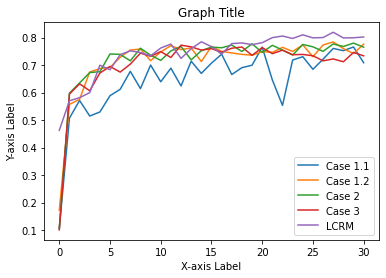

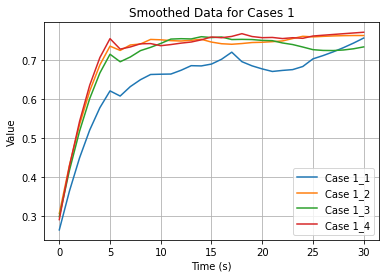

In [ ]:
import matplotlib.pyplot as plt

# Create a list of values for x-axis (assuming it to be 'Step')
# ADD VALUES FROM CASE1-3, LCRM AND SAVE UNDER VARIABLES  case1_1,..case3, lcrm
x = list(range(len(case1_1)))

# Plot the graph
plt.plot(x, case1_1, label='Case 1.1')
plt.plot(x, case1_2, label='Case 1.2')
plt.plot(x, case2, label='Case 2')
plt.plot(x, case3, label='Case 3')
plt.plot(x, lcrm, label='LCRM')

# Add a title and axis labels
plt.title('Graph Title')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Add a legend
plt.legend()

# Show the plot
plt.show()

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# apply savgol filter to smooth the data
case1_1_smooth = savgol_filter(case1_1, 11, 2)
case1_2_smooth = savgol_filter(case1_2, 11, 2)
case3_smooth = savgol_filter(case3, 11, 2)
case2_smooth = savgol_filter(case2, 11, 2)
plt.grid(True)
# plot the smoothed data
plt.plot(case1_1_smooth, label='Case 1_1')
plt.plot(case1_2_smooth, label='Case 1_2')
plt.plot(case3_smooth, label='Case 1_3')
plt.plot(case2_smooth, label='Case 1_4')

# add titles and labels
plt.title('Smoothed Data for Cases 1')
plt.xlabel('Time (s)')
plt.ylabel('Value')

# add legend
plt.legend()

# show plot
plt.show()